In [1]:
#Импорты библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
#import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.kernel_ridge import KernelRidge
from func import analize_df, replace_outliers, find_outliers, popular_tok
import warnings
warnings.filterwarnings('ignore')


In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USSR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Загрузить датасет в Python.

df = pd.read_csv('TMDB_movie_dataset_v11.csv')

df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [4]:
#Изучаем содержимое
analize_df(df)
df.head(10)

dtypes
id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object
shape
(999692, 23)
isnull
id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            114492
revenue                      0


poster_path
/wtoKLMm4UvkwvcSwO3XWcs1gJuF.jpg    54
/cWjdh8VTiizYfQp5m6fJi4PDy8w.jpg    48
/je3JbUs3OEoYkS6Vd7iv7w6HUPu.jpg    45
/qpXweJ0Gbl5OmYZqzNWtDJovF8e.jpg    41
/nelvhFPqwYhAw8UFF81sDpFZSlD.jpg    39
                                    ..
/uFeZYILBd1c0wnaGFcct1NwR07c.jpg     1
/s3q8y3RBxhhjg5Ok7q7aJS2jXBN.jpg     1
/38yk98ijrNXpMSorMybqVYcTiok.jpg     1
/hvwMhXbSF2caavDJtZ0wVtjVx28.jpg     1
/w51L0ICRBDkpVA8xyqO2fyT0dy5.jpg     1
Name: count, Length: 720108, dtype: int64



tagline 138587 !!!!!!!!!!!!!!!!!!!!!!/
tagline
English                                                                154
animation short                                                        104
100% Lesbian                                                            73
Documentary                                                             59
AN INSIDE NO.9 FILM                                                     46
                                                                      ... 
Kate Douglas Wigg

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,...,en,Deadpool,The origin story of former Special Forces oper...,72.735,/zq8Cl3PNIDGU3iWNRoc5nEZ6pCe.jpg,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,...,en,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa"
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,...,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,69.498,/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg,Mischief. Mayhem. Soap.,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,...,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",33.255,/r7vmZjiyZw9rpJMQJdXpjgiCOk9.jpg,All heroes start somewhere.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English
9,680,Pulp Fiction,8.488,25893,Released,1994-09-10,213900000,154,False,/suaEOtk1N1sgg2MTM7oZd2cfVp3.jpg,...,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",74.862,/d5iIlFn5s0ImszYzBPb8JPIfbXD.jpg,Just because you are a character doesn't mean ...,"Thriller, Crime","Miramax, A Band Apart, Jersey Films",United States of America,"English, Spanish, French"


In [5]:
#Убираем лишнее
df=df.drop(['backdrop_path','poster_path','id','homepage','imdb_id','original_title','overview'], axis=1)
df=df.drop_duplicates()
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,tagline,genres,production_companies,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [6]:
#разбиваем дату на месяц и год 
#(день всё-таки слишком мелкая единица, а вот какую-то связь между популярностью и частью года в которой вышел фильм можно попробовать найти)
#вроде того что под новый год люди смотрят больше и шансов получить более тёплый приём из-за этого больше
df['release_month']=(pd.to_datetime(df['release_date']).dt.month%12)
df['release_year']=pd.to_datetime(df['release_date']).dt.year
df=df.fillna(value={'release_year':df['release_year'].mean(), 'release_month':df['release_month'].mean(),'spoken_languages':'No_Information','production_countries':'No_Information','original_title':'No_Information','title':'No_Information','genres':'No_Information'})
df=df.drop(['release_date'], axis=1)
df.head()

,title,vote_average,vote_count,status,revenue,runtime,adult,budget,original_language,popularity,tagline,genres,production_companies,production_countries,spoken_languages,release_month,release_year
0,Inception,8.364,34495,Released,825532764,148,False,160000000,en,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",7.0,2010.0
1,Interstellar,8.417,32571,Released,701729206,169,False,165000000,en,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,11.0,2014.0
2,The Dark Knight,8.512,30619,Released,1004558444,152,False,185000000,en,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",7.0,2008.0
3,Avatar,7.573,29815,Released,2923706026,162,False,237000000,en,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",0.0,2009.0
4,The Avengers,7.710,29166,Released,1518815515,143,False,220000000,en,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",4.0,2012.0


In [7]:
#На момент выполнения работы и сбора датасета это ещё было будущим, но здесь их уже выпустии... или Назад в будущее - документалка, или это намёк на то что датасет почистить бы
df[(df['status'].isin(['Released', 'Post Production']))&(df['release_year']>2023)]

,title,vote_average,vote_count,status,revenue,runtime,adult,budget,original_language,popularity,tagline,genres,production_companies,production_countries,spoken_languages,release_month,release_year
217455,Hiver 54 : L'Abbé Pierre et l'insurrection de ...,8.0,2,Released,0,0,False,0,fr,0.000,NaN,Documentary,"Bleu Kobalt, Ina",France,French,1.0,2024.0
222298,Achtung Orcas! Gefahr vor Gibraltar?,8.0,2,Released,0,0,False,0,de,0.000,NaN,"Documentary, TV Movie","K22 Film, ZDF",Germany,"German, English, Spanish",2.0,2024.0
222349,The Height of Ignorance,9.5,2,Released,100,10,False,200,en,0.000,Two sisters face the presence of a nosy Securi...,"Drama, History",NaN,Romania,"English, Romanian",2.0,2024.0
224696,Manouchian et ceux de l'Affiche rouge,7.0,1,Released,0,0,False,0,fr,0.000,NaN,Documentary,"Nova Production, France Télévisions",France,No_Information,2.0,2024.0
224804,עומדים מהצד,10.0,1,Released,0,0,False,1,he,1.400,NaN,Drama,NaN,Israel,Hebrew,1.0,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955043,The Perfumed Hill,0.0,0,Post Production,0,0,False,0,fr,1.070,NaN,"Drama, Romance","Archipel 33>35, Cinéfrance, Dune Vision","France, Mauritania, Taiwan","Mandarin, French",2.0,2024.0
978513,The Fall Guy,0.0,0,Post Production,0,0,False,0,en,5.999,NaN,"Action, Adventure, Thriller","Universal Pictures, 87North Productions, Enter...",United States of America,English,2.0,2024.0
983562,Party of Fools,0.0,0,Released,0,122,False,6000000,fr,2.425,NaN,"Thriller, History, Drama","Prélude, France 2 Cinéma",France,French,2.0,2024.0
994557,Snot and Splash,0.0,0,Released,0,88,False,2906000,fi,1.934,NaN,"Family, Adventure, Comedy",It's Alive Films,Finland,Finnish,1.0,2024.0


In [8]:
#Оставляем только уже вышедшие фильмы
df=df[df['tagline'].isnull()!=True]
df=df[df['status']!='Canceled']
df=df[df['status'].isin(['Released', 'Post Production'])]
df=df[df['release_year']<2024]
df=df.drop(['status'],axis=1)

In [9]:
df.isnull().sum(),df.isnull().sum()/df.shape[0]*100

(title                       0
 vote_average                0
 vote_count                  0
 revenue                     0
 runtime                     0
 adult                       0
 budget                      0
 original_language           0
 popularity                  0
 tagline                     0
 genres                      0
 production_companies    47146
 production_countries        0
 spoken_languages            0
 release_month               0
 release_year                0
 dtype: int64,
 title                    0.000000
 vote_average             0.000000
 vote_count               0.000000
 revenue                  0.000000
 runtime                  0.000000
 adult                    0.000000
 budget                   0.000000
 original_language        0.000000
 popularity               0.000000
 tagline                  0.000000
 genres                   0.000000
 production_companies    33.290261
 production_countries     0.000000
 spoken_languages         0.000000

In [10]:
df.head()

,title,vote_average,vote_count,revenue,runtime,adult,budget,original_language,popularity,tagline,genres,production_companies,production_countries,spoken_languages,release_month,release_year
0,Inception,8.364,34495,825532764,148,False,160000000,en,83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",7.0,2010.0
1,Interstellar,8.417,32571,701729206,169,False,165000000,en,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,11.0,2014.0
2,The Dark Knight,8.512,30619,1004558444,152,False,185000000,en,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",7.0,2008.0
3,Avatar,7.573,29815,2923706026,162,False,237000000,en,79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",0.0,2009.0
4,The Avengers,7.710,29166,1518815515,143,False,220000000,en,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",4.0,2012.0


In [11]:
#Т.к. мы выкинули часть строк некоторые методы могут давать сбои из-за пропусков в индексах. поправим это у уберём лишние столбцы
df=df.reset_index().drop(['index','original_language','production_companies'],axis=1)

In [12]:
#Выносим наиболее частые слова
df=popular_tok(df, ['genres','production_countries','spoken_languages'], delit_after_work=True,
            min_df=0.05, max_df=0.9999, use_other=True)
df.head()

genres After runing, no terms remain
genres drop
production_countries After runing, no terms remain
production_countries drop
spoken_languages After runing, no terms remain
spoken_languages drop


,title,vote_average,vote_count,revenue,runtime,adult,budget,popularity,tagline,release_month,release_year
0,Inception,8.364,34495,825532764,148,False,160000000,83.952,Your mind is the scene of the crime.,7.0,2010.0
1,Interstellar,8.417,32571,701729206,169,False,165000000,140.241,Mankind was born on Earth. It was never meant ...,11.0,2014.0
2,The Dark Knight,8.512,30619,1004558444,152,False,185000000,130.643,Welcome to a world without rules.,7.0,2008.0
3,Avatar,7.573,29815,2923706026,162,False,237000000,79.932,Enter the world of Pandora.,0.0,2009.0
4,The Avengers,7.710,29166,1518815515,143,False,220000000,98.082,Some assembly required.,4.0,2012.0


In [13]:
df['revenue']=df['revenue']/(df['budget']+1)

budget


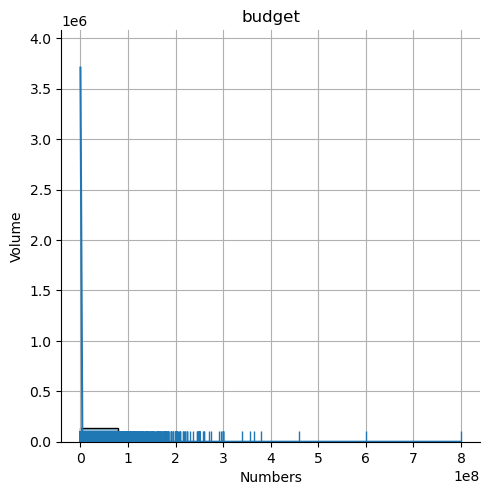

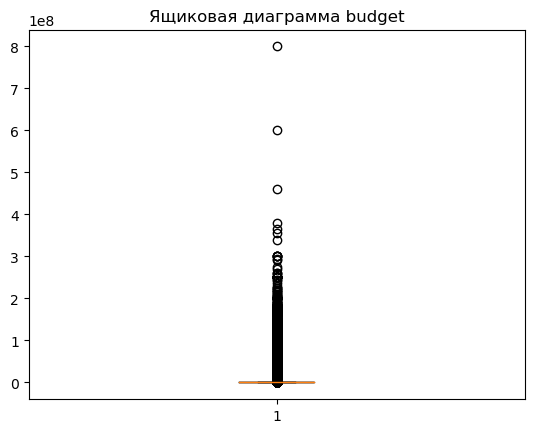

0.0 0.0 1762886.6112158508 0.0 800000000.0
Межквартильный размах: 0.0 0.0




runtime


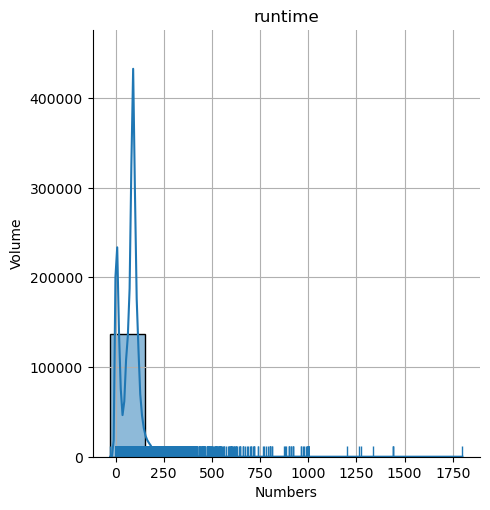

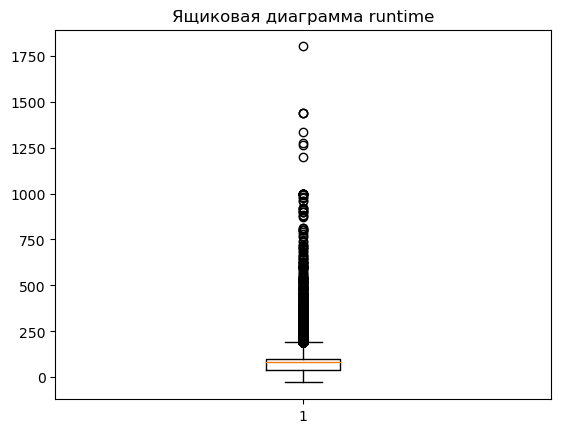

-28.0 40.0 75.49653653059927 100.0 1800.0
Межквартильный размах: -50.0 190.0




revenue


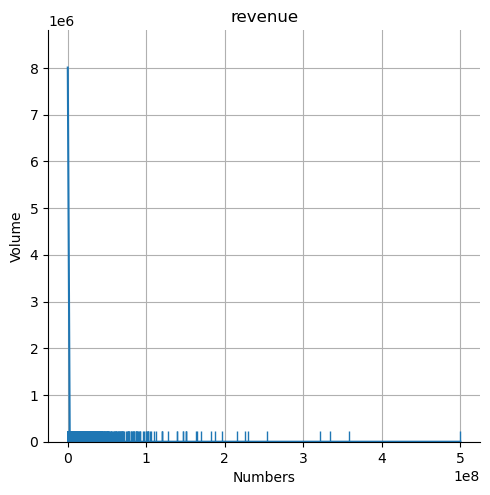

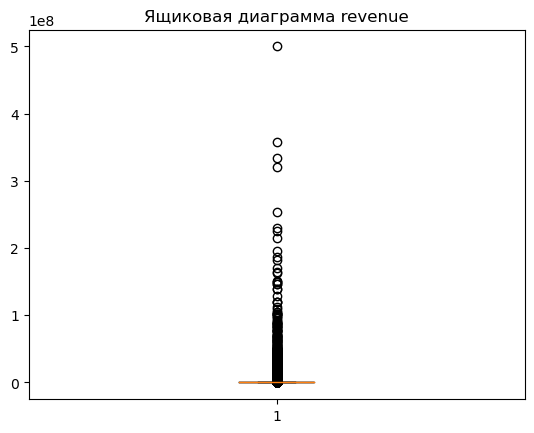

-0.9230769230769231 0.0 191661.8417832898 0.0 500000000.0
Межквартильный размах: 0.0 0.0




vote_count


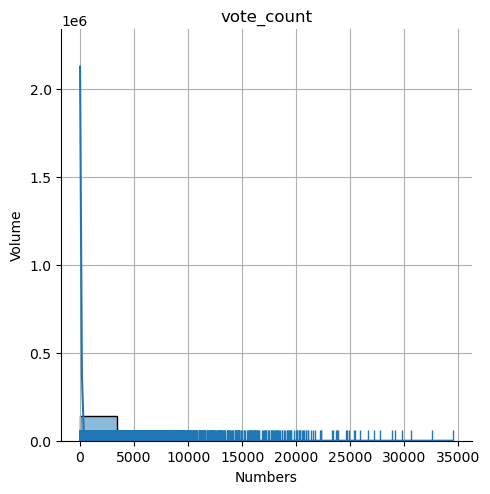

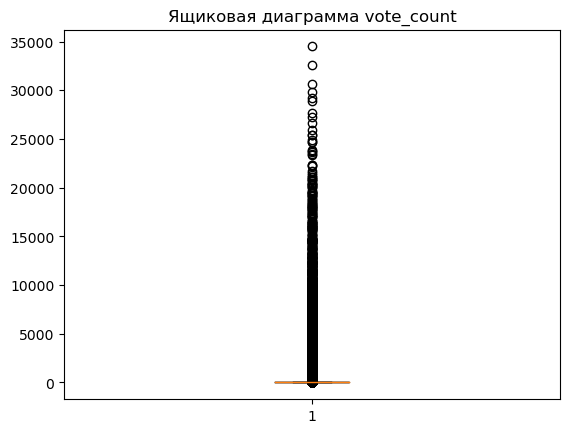

0.0 0.0 126.96384716955819 9.0 34495.0
Межквартильный размах: -13.5 22.5




vote_average


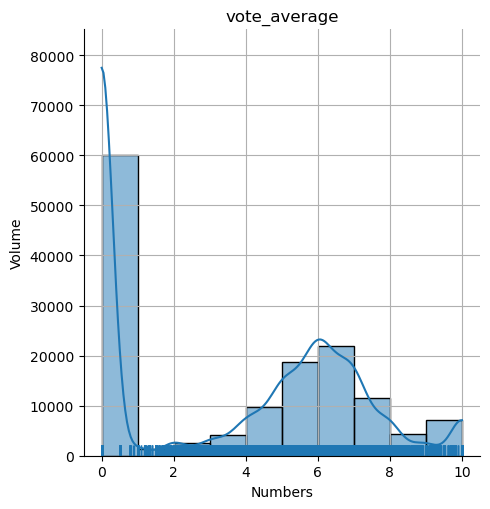

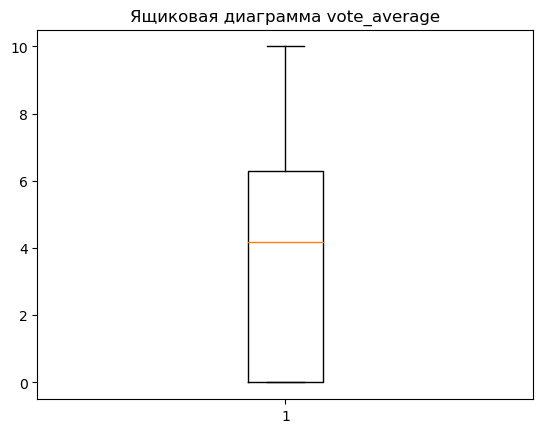

0.0 0.0 3.50003573622556 6.3 10.0
Межквартильный размах: -9.45 15.75




release_month


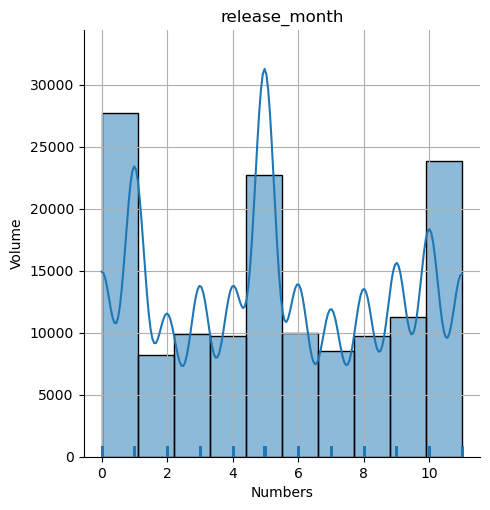

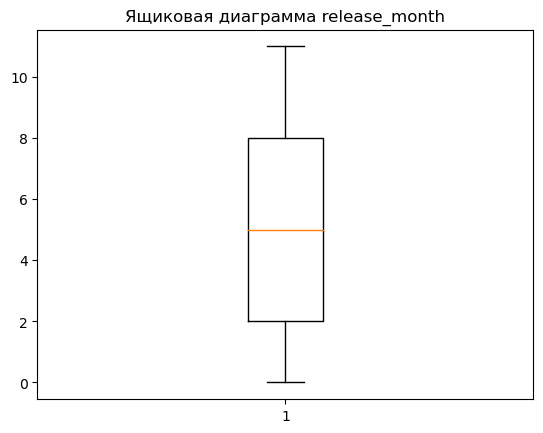

0.0 2.0 5.387272094739187 8.0 11.0
Межквартильный размах: -7.0 17.0




release_year


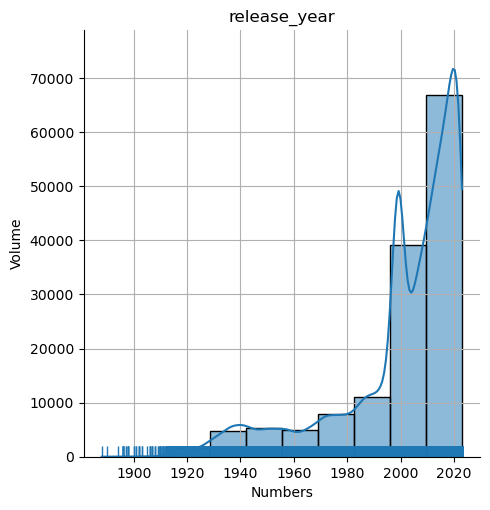

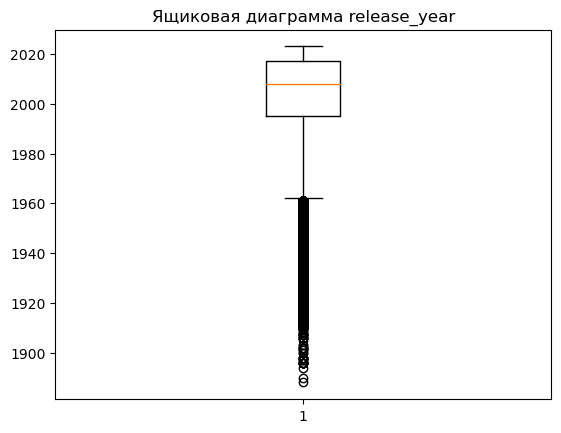

1888.0 1995.0 2000.2885254966202 2017.0 2023.0
Межквартильный размах: 1962.0 2050.0




popularity


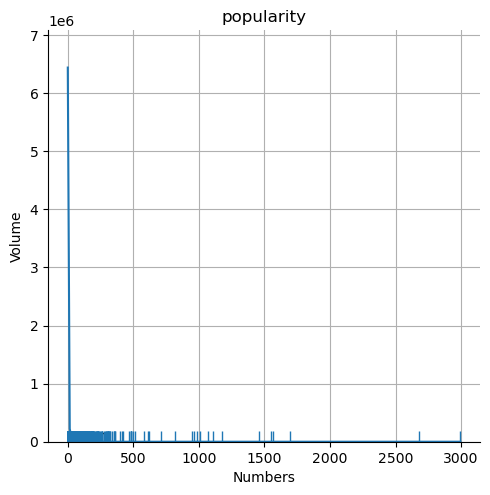

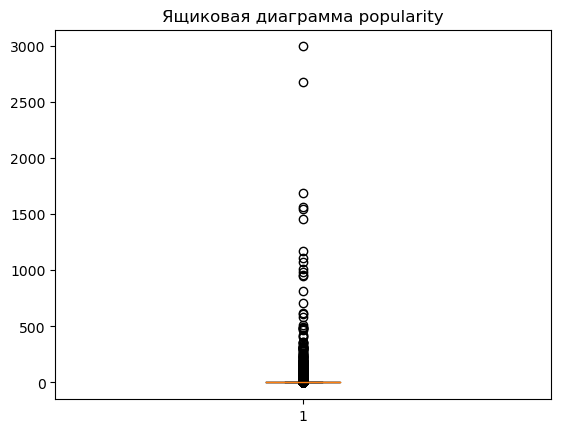

0.0 0.6 3.4726671115159475 2.491 2994.357
Межквартильный размах: -2.2365 5.327500000000001






,title,vote_average,vote_count,revenue,runtime,adult,budget,popularity,tagline,release_month,release_year
0,Inception,8.364,34495,5.159580,148,False,160000000,83.952,Your mind is the scene of the crime.,7.000000,2010.000000
1,Interstellar,8.417,32571,4.252904,169,False,165000000,140.241,Mankind was born on Earth. It was never meant ...,11.000000,2014.000000
2,The Dark Knight,8.512,30619,5.430046,152,False,185000000,130.643,Welcome to a world without rules.,7.000000,2008.000000
3,Avatar,7.573,29815,12.336312,162,False,237000000,79.932,Enter the world of Pandora.,0.000000,2009.000000
4,The Avengers,7.710,29166,6.903707,143,False,220000000,98.082,Some assembly required.,4.000000,2012.000000
...,...,...,...,...,...,...,...,...,...,...,...
141616,Altered States: Alcohol and Other Drugs in Ame...,0.000,0,0.000000,56,False,0,0.600,A History Of Drug Use In America,1.000000,1993.000000
141617,Sotto lo Stesso Cielo,0.000,0,9.900990,67,False,100,0.600,ISAN,4.955312,1999.043999
141618,A Dry River,0.000,0,0.000000,1,False,0,0.600,Mexican Styx.,6.000000,2020.000000
141619,The story of saj,0.000,0,0.000000,22,True,0,0.600,Hadotah mn saj,2.000000,2011.000000


In [14]:
#поиск выбросов
index_array=['budget','runtime','revenue','vote_count','vote_average','release_month','release_year','popularity']

find_outliers(index_array, df)

In [15]:
#убираем выбросы
replace_outliers('budget', 0, df['budget'].mean(), df)
replace_outliers('runtime', 0, 178.0, df)
replace_outliers('vote_count', 0, 50, df)
replace_outliers('release_year', 1960,2023, df)
replace_outliers('popularity', 0, 500, df)
l=['budget','runtime','vote_count','release_month','release_year']
for target in l:
    df[target]=df[target]/df[target].max()

budget
low 0.0
high 6.170695024043044
all 6.170695024043044
runtime
low 0.0007061099695666604
high 2.091497729856448
all 2.0922038398260145
vote_count
low 0.0
high 12.558871918712619
all 12.558871918712619
release_year
low 9.47175913176718
high 0.0
all 9.47175913176718
popularity
low 0.0
high 0.013416089421766546
all 0.013416089421766546


In [16]:
#Очистка текста от неалфавитных символов.
df['tagline']=df['tagline'].replace('[^a-zA-Z ]', '', regex=True)
df['tagline'].head()


0                  Your mind is the scene of the crime
1    Mankind was born on Earth It was never meant t...
2                     Welcome to a world without rules
3                           Enter the world of Pandora
4                               Some assembly required
Name: tagline, dtype: object

In [17]:
df['tagline']=df['tagline'].str.lower()

In [18]:


#Лемматизация.
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

#Токенизация.
tokenizer = RegexpTokenizer("[\w']+",gaps=False)#(", ", gaps=True)
#Удаление стоп-слов.
#Векторизация текста.
vectorizer = CountVectorizer(min_df=0.006, max_df=0.6,preprocessor=lemmatize_text,#lowercase = True,#preprocessor=lemmatize_text, 
                             tokenizer=tokenizer.tokenize,stop_words="english")#

slov = vectorizer.fit_transform(df['tagline'])
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out())

76
['action' 'adventure' 'best' 'big' 'boy' 'change' 'city' 'come' 'comedy'
 'day' 'dead' 'death' 'die' 'documentary' 'dont' 'dream' 'end' 'evil'
 'family' 'fight' 'film' 'friend' 'game' 'girl' 'good' 'got' 'great'
 'greatest' 'ha' 'heart' 'hell' 'history' 'home' 'journey' 'just' 'kill'
 'killer' 'know' 'let' 'life' 'like' 'little' 'live' 'look' 'love' 'make'
 'man' 'meet' 'men' 'movie' 'murder' 'music' 'new' 'night' 'past' 'people'
 'real' 'secret' 'sex' 'short' 'story' 'tale' 'thing' 'time' 'true'
 'truth' 'u' 'wa' 'want' 'war' 'way' 'woman' 'world' 'year' 'young'
 'youre']


In [19]:
df=pd.concat(
    [df,pd.DataFrame(slov.A, columns=vectorizer.get_feature_names_out())],
    axis=1)
df=df.drop(['tagline'],axis=1)
df.head() 

,title,vote_average,vote_count,revenue,runtime,adult,budget,popularity,release_month,release_year,...,u,wa,want,war,way,woman,world,year,young,youre
0,Inception,8.364,1.0,5.159580,0.831461,False,1.0,83.952,0.636364,0.993574,...,0,0,0,0,0,0,0,0,0,0
1,Interstellar,8.417,1.0,4.252904,0.949438,False,1.0,140.241,1.000000,0.995551,...,0,2,0,0,0,0,0,0,0,0
2,The Dark Knight,8.512,1.0,5.430046,0.853933,False,1.0,130.643,0.636364,0.992585,...,0,0,0,0,0,0,1,0,0,0
3,Avatar,7.573,1.0,12.336312,0.910112,False,1.0,79.932,0.000000,0.993080,...,0,0,0,0,0,0,1,0,0,0
4,The Avengers,7.710,1.0,6.903707,0.803371,False,1.0,98.082,0.363636,0.994563,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Смотрим корреляции и избавляемся от лишних столбцов
corrr=df[df.columns[1:]].corr().abs()

#sns.heatmap(corrr, annot=True, cbar= False)


In [21]:
corrr['revenue']

vote_average    0.046244
vote_count      0.094768
revenue         1.000000
runtime         0.030812
adult           0.015999
                  ...   
woman           0.001456
world           0.014325
year            0.001557
young           0.002976
youre           0.001338
Name: revenue, Length: 90, dtype: float64

In [22]:
corrr['popularity'][10:50]

runtime_outlier         1.362547e-02
vote_count_outlier      4.497496e-01
release_year_outlier    2.265922e-02
popularity_outlier      5.182714e-01
action                  1.198795e-02
adventure               2.230503e-02
best                    3.621013e-03
big                     1.465176e-03
boy                     7.632833e-03
change                  1.274196e-02
city                    2.938447e-03
come                    7.544446e-03
comedy                  1.286694e-03
day                     1.054585e-03
dead                    2.999919e-03
death                   8.135017e-04
die                     1.635933e-02
documentary             2.141321e-02
dont                    6.124175e-03
dream                   6.395527e-07
end                     1.128007e-02
evil                    1.822886e-02
family                  8.400027e-03
fight                   1.515783e-02
film                    2.551354e-02
friend                  3.038897e-03
game                    6.468228e-03
g

In [23]:
x=df.drop(corrr['popularity'][(corrr['popularity']<0.01)&(corrr['vote_average']<0.01)].index, axis=1)
x.head()

,title,vote_average,vote_count,revenue,runtime,adult,budget,popularity,release_month,release_year,...,secret,sex,short,story,true,truth,wa,war,world,young
0,Inception,8.364,1.0,5.159580,0.831461,False,1.0,83.952,0.636364,0.993574,...,0,0,0,0,0,0,0,0,0,0
1,Interstellar,8.417,1.0,4.252904,0.949438,False,1.0,140.241,1.000000,0.995551,...,0,0,0,0,0,0,2,0,0,0
2,The Dark Knight,8.512,1.0,5.430046,0.853933,False,1.0,130.643,0.636364,0.992585,...,0,0,0,0,0,0,0,0,1,0
3,Avatar,7.573,1.0,12.336312,0.910112,False,1.0,79.932,0.000000,0.993080,...,0,0,0,0,0,0,0,0,1,0
4,The Avengers,7.710,1.0,6.903707,0.803371,False,1.0,98.082,0.363636,0.994563,...,0,0,0,0,0,0,0,0,0,0


In [24]:

y=df[['title','popularity', 'revenue', 'vote_average']]
x=df.drop(['popularity', 'revenue', 'vote_average','title'], axis=1)
x.head()

,vote_count,runtime,adult,budget,release_month,release_year,budget_outlier,runtime_outlier,vote_count_outlier,release_year_outlier,...,u,wa,want,war,way,woman,world,year,young,youre
0,1.0,0.831461,False,1.0,0.636364,0.993574,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.949438,False,1.0,1.000000,0.995551,1,0,1,0,...,0,2,0,0,0,0,0,0,0,0
2,1.0,0.853933,False,1.0,0.636364,0.992585,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.910112,False,1.0,0.000000,0.993080,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,0.803371,False,1.0,0.363636,0.994563,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Разбить выборку на обучающую и тестовую.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [26]:

g=20000
krr = KernelRidge(alpha=1.0)
krr.fit(x_train[:g], y_train['popularity'][:g])

pred_pop=krr.predict(x_test[:100])
coef_pop=krr.dual_coef_

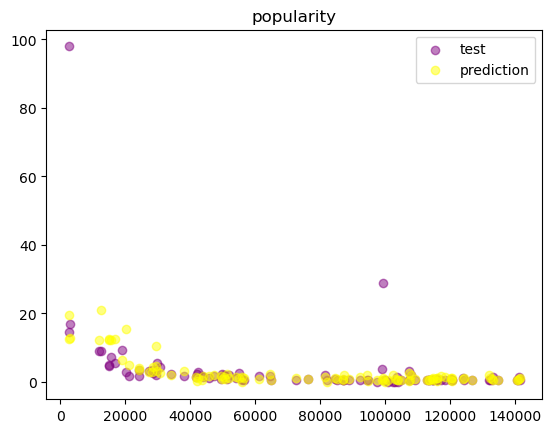

In [27]:

plt.scatter(
    x_test.index[:100], y_test['popularity'][:100], c="purple", alpha=0.5, label="test"
)
plt.scatter(
    x_test.index[:100], pred_pop[:100], c="yellow", alpha=0.5, label="prediction"
)
plt.title("popularity")
plt.legend()
plt.show()

In [28]:
g=20000
krr = KernelRidge(alpha=1.0)
krr.fit(x_train[:g], y_train['vote_average'][:g])

pred_vot=krr.predict(x_test[:100])
coef_vot=krr.dual_coef_

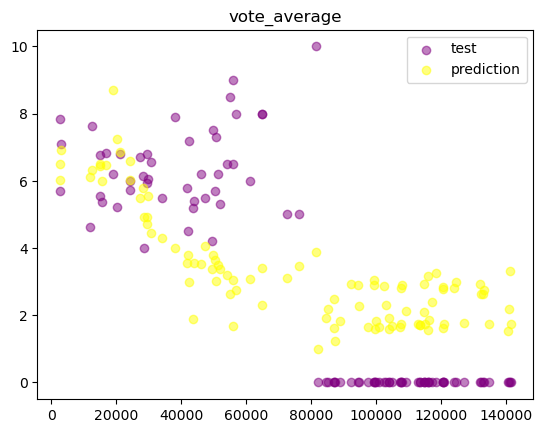

In [29]:

plt.scatter(
    x_test.index[:100], y_test['vote_average'][:100], c="purple", alpha=0.5, label="test"
)
plt.scatter(
    x_test.index[:100], pred_vot[:100], c="yellow", alpha=0.5, label="prediction"
)
plt.title("vote_average")
plt.legend()
plt.show()

In [30]:
#Сравниваем предсказанные и фактические результаты. Ожидаемо оценка фильма не настолько зависит от анотации, качество самого продукта также важно
y_test=y_test.reset_index()
for i in range(100):
    print(y_test['title'][i],'Истинное значение популярности',y_test['popularity'][i],'предсказанная популярность', pred_pop[i], 'истинная оценка',y_test['vote_average'][i],'предсказанная оценка', pred_vot[i])

    

Atlantic Convoy Истинное значение популярности 2.015 предсказанная популярность 1.249539561761793 истинная оценка 5.3 предсказанная оценка 3.3895841789887413
Deceived Истинное значение популярности 0.781 предсказанная популярность 1.1147965265904816 истинная оценка 0.0 предсказанная оценка 2.7689151048565463
Iron Wolf Истинное значение популярности 1.417 предсказанная популярность 1.647579487425645 истинная оценка 5.4 предсказанная оценка 3.5467237201673925
Camminando Nel Cielo Истинное значение популярности 0.721 предсказанная популярность 1.3916510453935302 истинная оценка 6.5 предсказанная оценка 3.0613310352551935
Ingratiate, Brooder Истинное значение популярности 1.4 предсказанная популярность 0.6244329286498669 истинная оценка 0.0 предсказанная оценка 1.930481921285832
Honto ni Atta! Noroi no Video 43 Истинное значение популярности 0.6 предсказанная популярность 0.9098328495379064 истинная оценка 0.0 предсказанная оценка 2.6274632740251036
The Lovers' Guide: Sex Play Истинное зна

In [31]:
#Смотрим какие слова пользуются спросом
g=x_test.columns[18:]
print('word', 'popularity', 'vote_average')
for i in range (len(g)):
    print(g[i],coef_pop[i],coef_vot[i])


word popularity vote_average
come 0.416708883606756 -1.4448539638806819
comedy -0.07149616122585326 8.137623282115868
day 0.49999311098565236 2.204719490699629
dead -0.3650601970285971 -1.99002809814618
death 0.10782436195956827 -1.6613609525639388
die 1.5699187114824673 -2.8795019008474765
documentary 0.2799796751932126 -2.795708958585872
dont -0.2678651466981081 -2.1108204467563465
dream 1.3151644165892036 2.3365324415814754
end -8.25211938578862 0.05954103455866827
evil 0.10328664116213308 1.1079138799093868
family 0.3354708153200207 4.3671079806773445
fight -0.04184293748171418 -1.7231973746442357
film -0.07927831013417246 4.6967518801637125
friend 0.29921047050427135 -1.5280338918493719
game 0.002598172741849321 5.157003669204833
girl 0.4528576647675951 -0.4439248661652054
good -0.49603539724515217 7.6551886163149225
got -2.45919011731503 0.6420746357610481
great -0.4980576078587538 -2.730834129547718
greatest 0.06831487959814166 -1.6299234950880352
ha 0.5565953142748369 -2.966226